# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

Vocabulario: {'cama', 'gato', 'perro', 'debajo', 'el', 'limpia', 'de', 'y', 'es', 'jardín', 'importante', 'cómoda', 'jugaron', 'limpieza', 'estaba', 'del', 'la', 'se', 'en', 'escondió'}

Matriz TF (Frecuencia Absoluta):
   cama  gato  perro  debajo  el  limpia  de  y  es  jardín  importante  \
0     1     1      0       1   1       0   1  0   0       0           0   
1     1     0      0       0   0       1   0  1   0       0           0   
2     0     1      1       0   3       0   0  1   0       1           0   
3     0     0      0       0   0       0   0  0   1       1           1   

   cómoda  jugaron  limpieza  estaba  del  la  se  en  escondió  
0       0        0         0       0    0   1   1   0         1  
1       1        0         0       1    0   1   0   0         0  
2       0        1         0       0    0   0   0   1         0  
3       0        0         1       0    1   1   0   0         0  

Matriz TF-IDF:
       cama    cómoda        de    debajo       del       

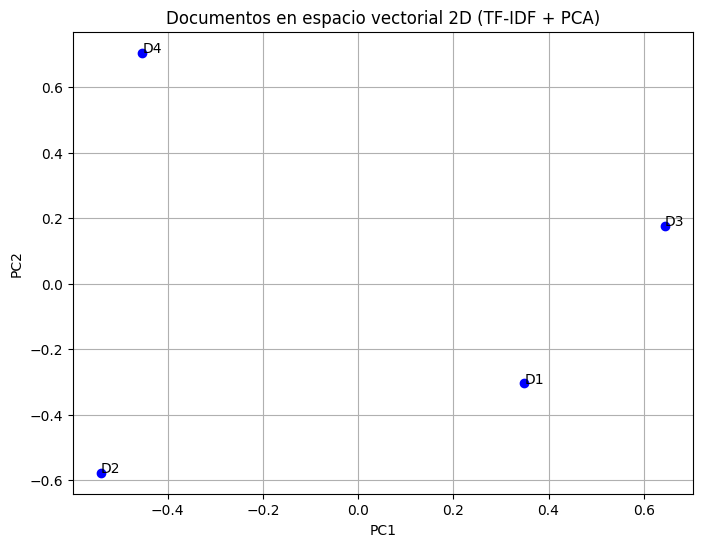

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Corpus
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# --- Construcción del vocabulario
vocab = set()
for doc in documents:
    for word in doc.lower().replace(".", "").split():
        vocab.add(word)
print("Vocabulario:", vocab)

# --- Construcción de la matriz TF manual
dict_tf = {}
i = 0
for doc in documents:
    dict_tfd = {}
    for term in vocab:
        count = doc.lower().replace(".", "").split().count(term)
        dict_tfd[term] = count
    dict_tf[i] = dict_tfd
    i += 1

# Matriz TF en DataFrame
matriz_tf = pd.DataFrame(dict_tf).T
print("\nMatriz TF (Frecuencia Absoluta):")
print(matriz_tf)

# --- TF-IDF con sklearn
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(documents)

# Mostrar la matriz TF-IDF
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print("\nMatriz TF-IDF:")
print(df_tfidf)

# --- Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(docs_2d[:, 0], docs_2d[:, 1], c='blue')
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i, 0], docs_2d[i, 1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# --- Reducción PCA y visualización 3D
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(X_tfidf.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2], c='green')

for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

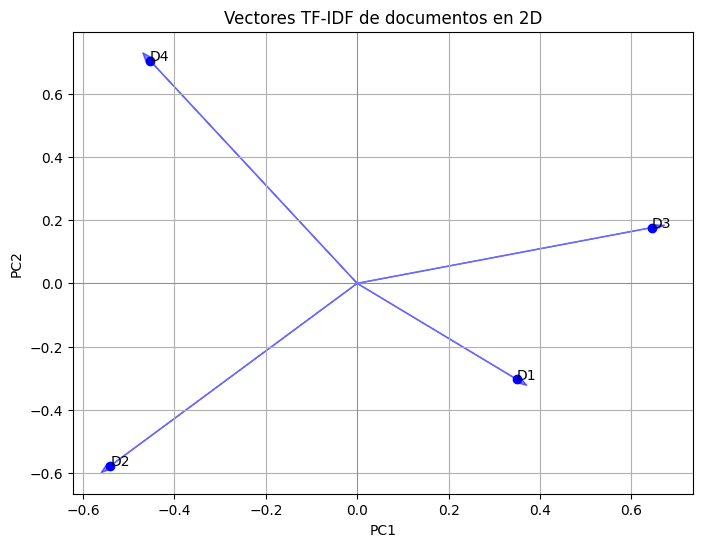

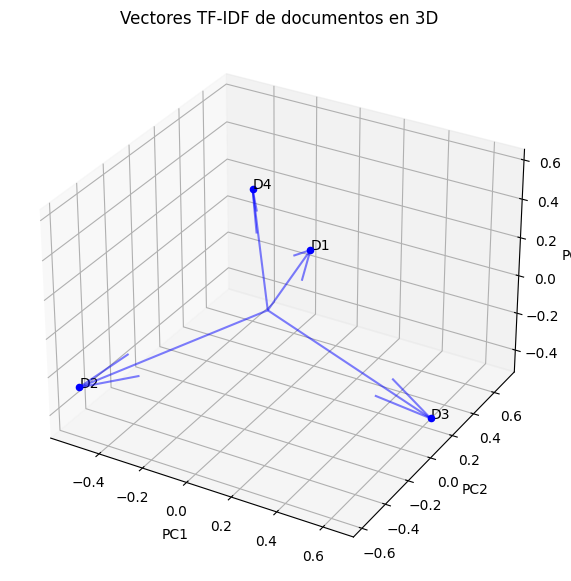


Similitudes coseno entre la consulta y cada documento:
Consulta vs D1: 0.4594
Consulta vs D2: 0.2595
Consulta vs D3: 0.5760
Consulta vs D4: 0.0936


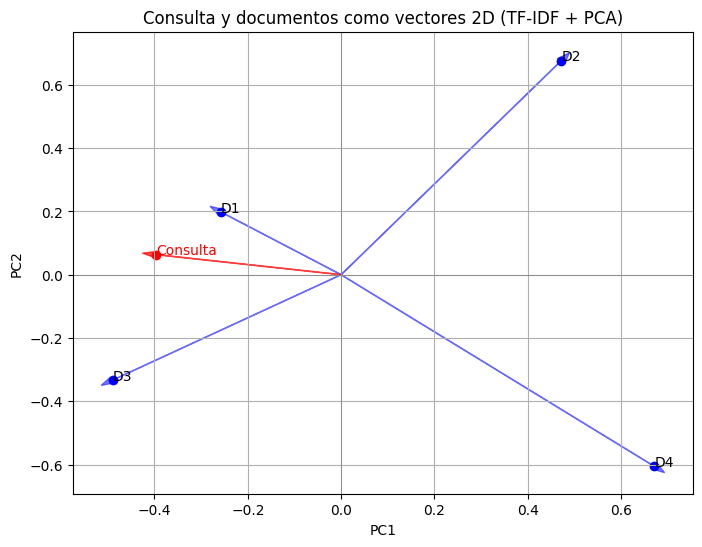

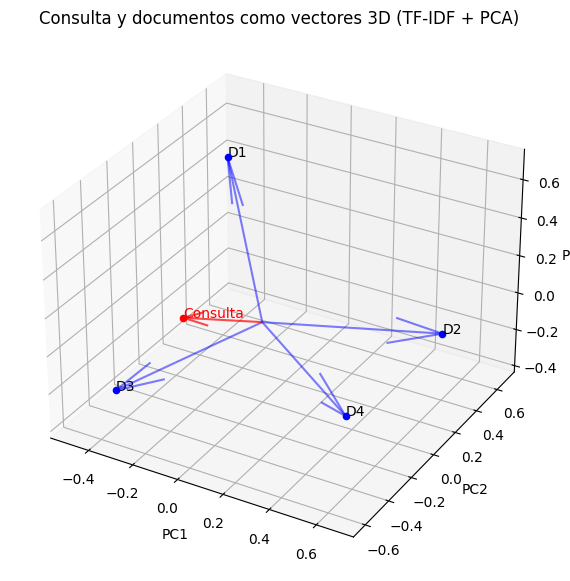

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D

# --- Parte 1: Documentos
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
doc_labels = ["D1", "D2", "D3", "D4"]

# --- TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(documents)

# --- Visualización 2D con vectores (flechas desde el origen)
pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
for i, label in enumerate(doc_labels):
    plt.scatter(docs_2d[i, 0], docs_2d[i, 1], c='blue')
    plt.annotate(label, (docs_2d[i, 0], docs_2d[i, 1]))
    plt.arrow(0, 0, docs_2d[i, 0], docs_2d[i, 1], color='blue', alpha=0.5, head_width=0.02)

plt.title("Vectores TF-IDF de documentos en 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()

# --- Visualización 3D con vectores
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(X_tfidf.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(doc_labels):
    ax.scatter(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], c='blue')
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], label)
    ax.quiver(0, 0, 0, docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], color='blue', alpha=0.5)

ax.set_title("Vectores TF-IDF de documentos en 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# --- Parte 2: Consulta
consulta = "el gato en la cama"
documentos_con_consulta = documents + [consulta]
vectorizer_tfidf = TfidfVectorizer()
X_tfidf_total = vectorizer_tfidf.fit_transform(documentos_con_consulta)

vectores_docs = X_tfidf_total[:-1]
vector_consulta = X_tfidf_total[-1:]

# Similitud coseno
similitudes = cosine_similarity(vector_consulta, vectores_docs)[0]
print("\nSimilitudes coseno entre la consulta y cada documento:")
for i, sim in enumerate(similitudes):
    print(f"Consulta vs D{i+1}: {sim:.4f}")

# --- Visualización 2D con consulta como vector
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_tfidf_total.toarray())

plt.figure(figsize=(8, 6))
for i, label in enumerate(doc_labels):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], c='blue')
    plt.annotate(label, (X_2d[i, 0], X_2d[i, 1]))
    plt.arrow(0, 0, X_2d[i, 0], X_2d[i, 1], color='blue', alpha=0.5, head_width=0.02)
# Consulta
plt.scatter(X_2d[-1, 0], X_2d[-1, 1], c='red')
plt.annotate("Consulta", (X_2d[-1, 0], X_2d[-1, 1]), color='red')
plt.arrow(0, 0, X_2d[-1, 0], X_2d[-1, 1], color='red', alpha=0.7, head_width=0.02)

plt.title("Consulta y documentos como vectores 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()

# --- Visualización 3D con consulta como vector
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_tfidf_total.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(doc_labels):
    ax.scatter(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], c='blue')
    ax.text(X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], label)
    ax.quiver(0, 0, 0, X_3d[i, 0], X_3d[i, 1], X_3d[i, 2], color='blue', alpha=0.5)
# Consulta
ax.scatter(X_3d[-1, 0], X_3d[-1, 1], X_3d[-1, 2], c='red')
ax.text(X_3d[-1, 0], X_3d[-1, 1], X_3d[-1, 2], "Consulta", color='red')
ax.quiver(0, 0, 0, X_3d[-1, 0], X_3d[-1, 1], X_3d[-1, 2], color='red', alpha=0.7)

ax.set_title("Consulta y documentos como vectores 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ranking de documentos según relevancia con la consulta:
D3: similitud = 0.4813
D1: similitud = 0.3839
D2: similitud = 0.2168
D4: similitud = 0.0782


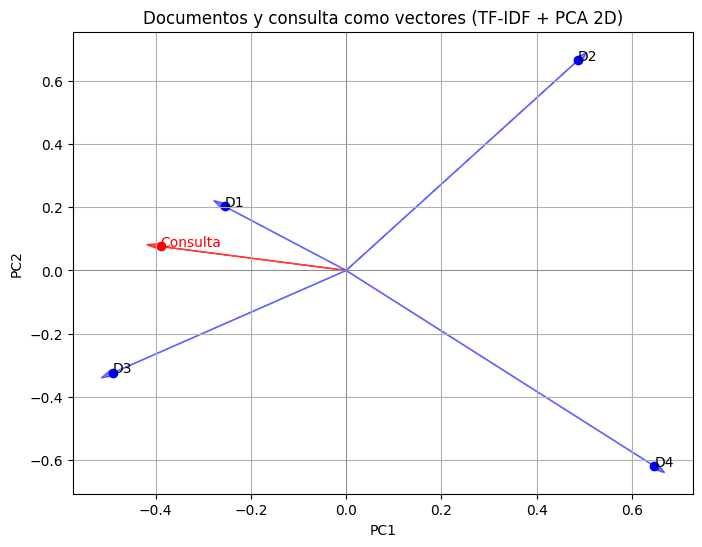

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# --- Corpus
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
doc_labels = ["D1", "D2", "D3", "D4"]

# --- Consulta
consulta = "el gato duerme en la cama"

# --- Vectorización TF-IDF
documentos_con_consulta = documents + [consulta]
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(documentos_con_consulta)

vectores_docs = X_tfidf[:-1]
vector_consulta = X_tfidf[-1:]

# --- Similitud coseno
similitudes = cosine_similarity(vector_consulta, vectores_docs)[0]

# --- Ranking
ranking = sorted(enumerate(similitudes), key=lambda x: x[1], reverse=True)
print("Ranking de documentos según relevancia con la consulta:")
for idx, score in ranking:
    print(f"{doc_labels[idx]}: similitud = {score:.4f}")

# --- Reducción PCA a 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_tfidf.toarray())

# --- Visualización en 2D
plt.figure(figsize=(8, 6))

# Vectores de documentos
for i, label in enumerate(doc_labels):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], c='blue')
    plt.annotate(label, (X_2d[i, 0], X_2d[i, 1]))
    plt.arrow(0, 0, X_2d[i, 0], X_2d[i, 1], color='blue', alpha=0.5, head_width=0.02)

# Vector de consulta
plt.scatter(X_2d[-1, 0], X_2d[-1, 1], c='red')
plt.annotate("Consulta", (X_2d[-1, 0], X_2d[-1, 1]), color='red')
plt.arrow(0, 0, X_2d[-1, 0], X_2d[-1, 1], color='red', alpha=0.7, head_width=0.02)

plt.title("Documentos y consulta como vectores (TF-IDF + PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()
